In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

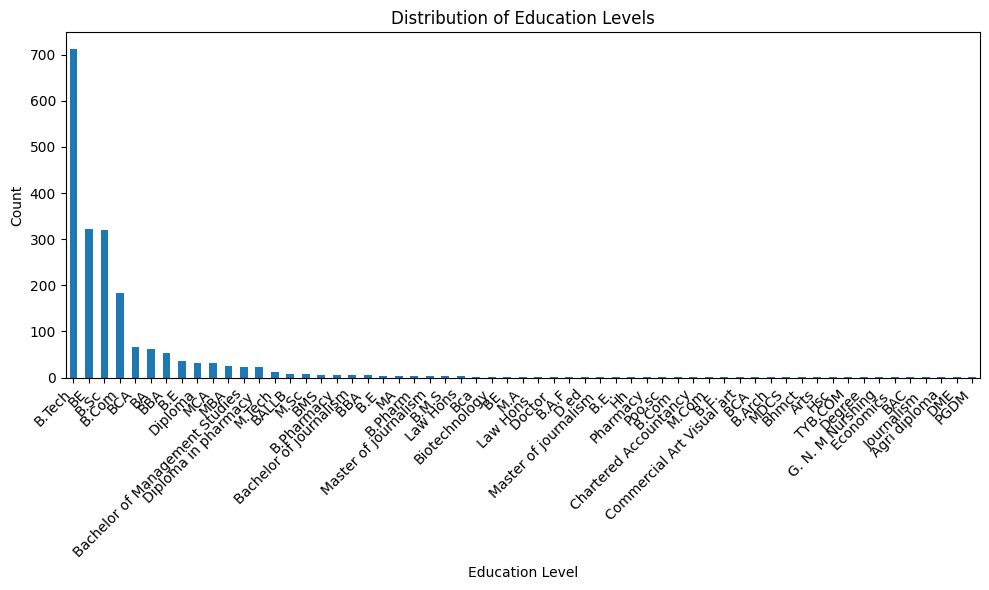

In [ ]:
df = pd.read_csv('resume_extraction.csv')
#create a histogram plot of the education column
plt.figure(figsize=(10, 6))
df['Education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

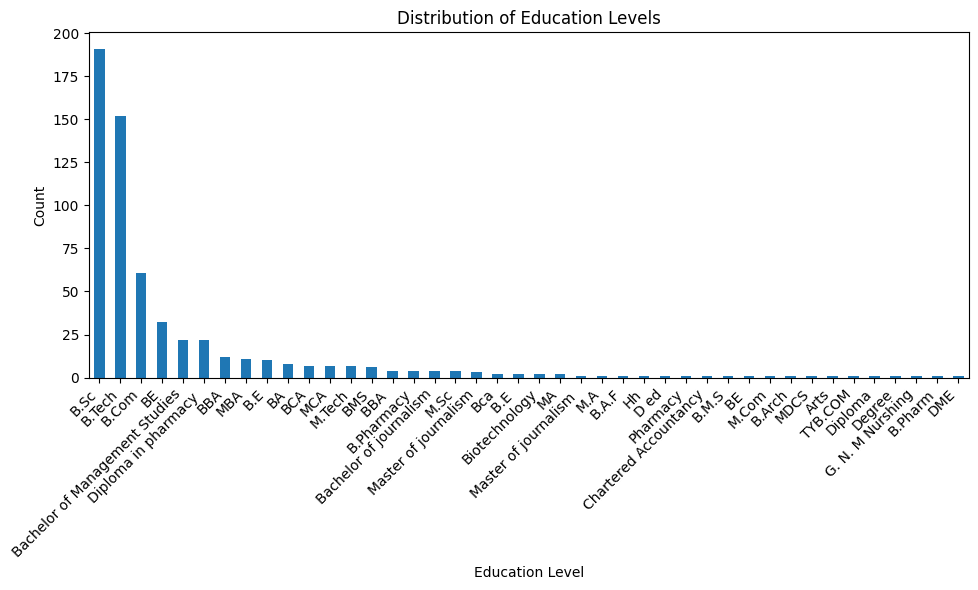

In [18]:
# remove rows with all missing values
df = df[df.notna().all(axis=1)]
#create a histogram plot of the education column
plt.figure(figsize=(10, 6))
df['Education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [21]:
# split the interest column into a list of interests based on comma, semicolon, and slash and name the new columns interests_1, interests_2, interests_3, etc.

# Define a function to split the interests and return a list
def split_interests(interest_str):
    if pd.isna(interest_str):
        return []
    
    # Replace semicolons and slashes with commas
    interest_str = interest_str.replace(';', ',').replace('/', ',')
    
    # Split by comma and strip whitespace
    interests = [interest.strip() for interest in interest_str.split(',')]
    
    # Remove empty strings
    interests = [interest for interest in interests if interest]
    
    return interests

# Apply the function to the Interest column
interests_lists = df['interests'].apply(split_interests)

# Find the maximum number of interests
max_interests = max(len(interests) for interests in interests_lists)

# Create new columns for each interest
for i in range(max_interests):
    column_name = f'interests_{i+1}'
    df[column_name] = interests_lists.apply(lambda x: x[i] if i < len(x) else None)

# Display the first few rows to verify the split
print(df[['interests'] + [f'interests_{i+1}' for i in range(max_interests)]].head())


                    interests      interests_1 interests_2 interests_3  \
5   Research, Sales/Marketing         Research       Sales   Marketing   
9                  Technology       Technology        None        None   
10              News Coverage    News Coverage        None        None   
11            Cloud computing  Cloud computing        None        None   
17  Research, Sales/Marketing         Research       Sales   Marketing   

   interests_4 interests_5 interests_6 interests_7 interests_8 interests_9  \
5         None        None        None        None        None        None   
9         None        None        None        None        None        None   
10        None        None        None        None        None        None   
11        None        None        None        None        None        None   
17        None        None        None        None        None        None   

   interests_10 interests_11 interests_12 interests_13 interests_14  \
5          None

In [25]:
#strip column names of whitespace
df.columns = df.columns.str.strip()


In [26]:
# Define a function to split the skills and return a list
def split_skills(skills_str):
    if pd.isna(skills_str):
        return []
    
    # Replace semicolons and slashes with commas
    skills_str = skills_str.replace(';', ',').replace('/', ',')
    
    # Split by comma and strip whitespace
    skills = [skill.strip() for skill in skills_str.split(',')]
    
    # Remove empty strings
    skills = [skill for skill in skills if skill]
    
    return skills

# Apply the function to the skills column
skills_lists = df['skills'].apply(split_skills)

# Find the maximum number of skills
max_skills = max(len(skills) for skills in skills_lists)

# Create new columns for each skill
for i in range(max_skills):
    column_name = f'skills_{i+1}'
    df[column_name] = skills_lists.apply(lambda x: x[i] if i < len(x) else None)

# Display the first few rows to verify the split
print(df[['skills'] + [f'skills_{i+1}' for i in range(max_skills)]].head())

                                               skills              skills_1  \
5   Critical Thinking, Analytic Thinking, Communic...     Critical Thinking   
9                  Active Listening;Critical Thinking      Active Listening   
10  Communication Skills, Leadership, Problem Solv...  Communication Skills   
11                                    Python;SQL;Java                Python   
17  Critical Thinking, Analytic Thinking, Communic...     Critical Thinking   

             skills_2                skills_3           skills_4 skills_5  \
5   Analytic Thinking    Communication Skills  Creativity Skills    Excel   
9   Critical Thinking                    None               None     None   
10         Leadership  Problem Solving skills  Subject Knowledge     None   
11                SQL                    Java               None     None   
17  Analytic Thinking    Communication Skills  Creativity Skills    Excel   

          skills_6              skills_7             skills_8 

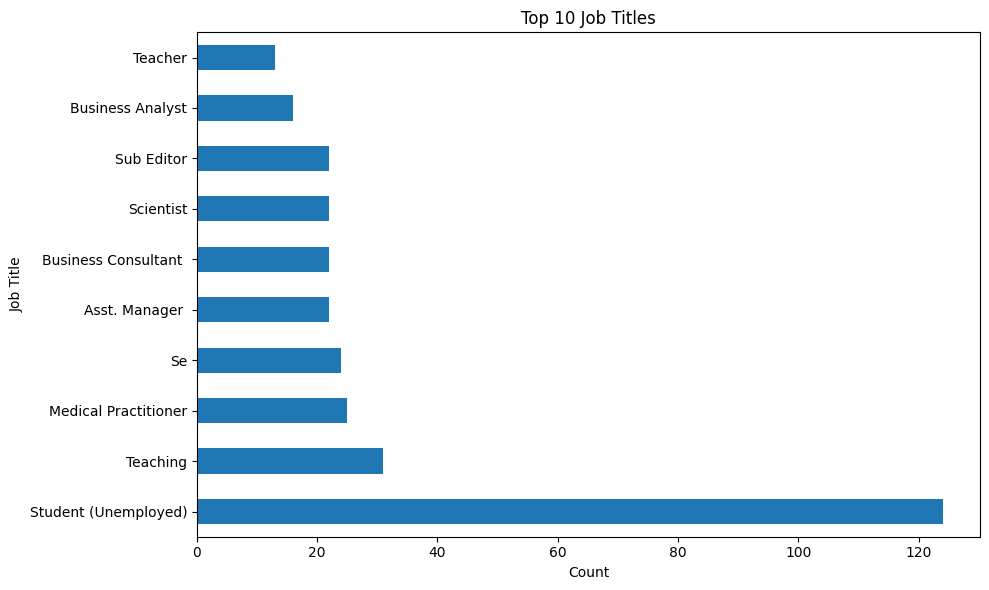

In [29]:
# histogram of column 'Job_title' of the top 10 job titles

# Get the top 10 job titles by frequency
top_10_jobs = df['Job_title'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_jobs.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles')
plt.tight_layout()
plt.show()
